In [14]:
import uproot as ur
import pandas as pd
from scipy.stats import iqr, mode 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from scipy.stats import mode, iqr
import scipy.stats

In [28]:
fileJet = ur.open('/home/jmsardain/JetCalib/PUMitigation/final/plotting/output.root')['jetInfoTree']
# dfJet = fileJet.arrays(library='pd')
fileClus = ur.open('/home/jmsardain/JetCalib/PUMitigation/final/ckpts/EdgeConv/out_EdgeConv_.root')['aTree']
dfClus = fileClus.arrays(library='pd')

ModuleNotFoundError: install the 'awkward-pandas' package with:
    pip install awkward-pandas # not on conda-forge yet

In [41]:
fileJet = ur.open('/home/jmsardain/JetCalib/PUMitigation/final/plotting/output.root')['jetInfoTree']
fileJet.arrays()
# jetEMpt_values

<Array [{jetEMpt: {...}, ...}, ..., {...}] type='67762 * {jetEMpt: TLorentz...'>

In [3]:
dfJet.to_csv('/home/jmsardain/JetCalib/PUMitigation/final/plotting/forPlotting.csv', index=False)

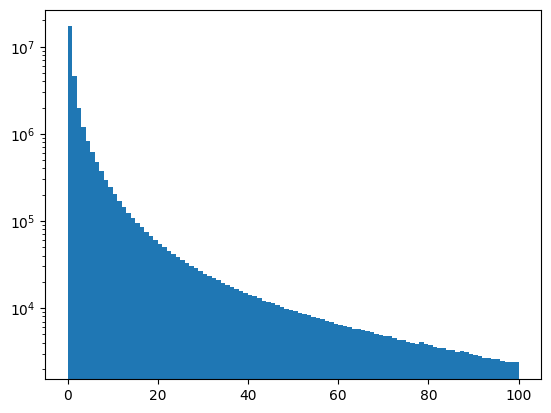

In [9]:
filename = ur.open('/home/jmsardain/JetCalib/PUMitigation/final/MakeROOT/output_pu.root')["ClusterTree"]
df = filename.arrays(library='pd')


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
        275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
        330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
        385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
        440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
        495., 500.]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58,

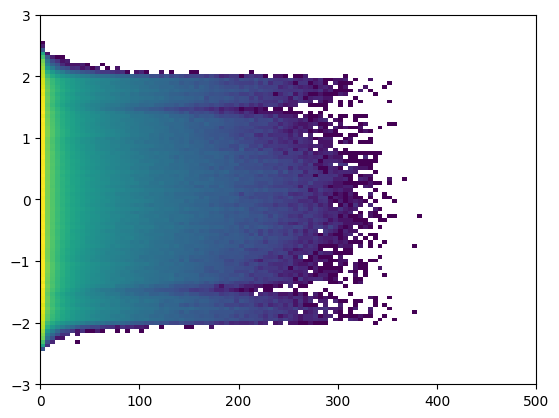

In [13]:

bins = np.linspace(0, 500, 100+1) 
binseta = np.linspace(-3, 3, 100+1)
plt.hist2d(df['clusterPt'], df['clusterEta'], bins=[bins, binseta], norm=mcolors.LogNorm())
# plt.yscale('log')

In [4]:
binsEnergy = np.logspace (-2, 3, 100+1)
binsPt     = np.logspace(1, 3, 20+1)
binsResp   = np.linspace(0, 10, 100+1) 

## plot cluster response 

/tmp/ipykernel_26351/80172278.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.hist(dfClus.clusterE.values / dfClus.cluster_ENG_CALIB_TOT.values, bins=binsResp, label=r'R$^{EM}$',alpha=0.3, histtype='step', linewidth=1.5)


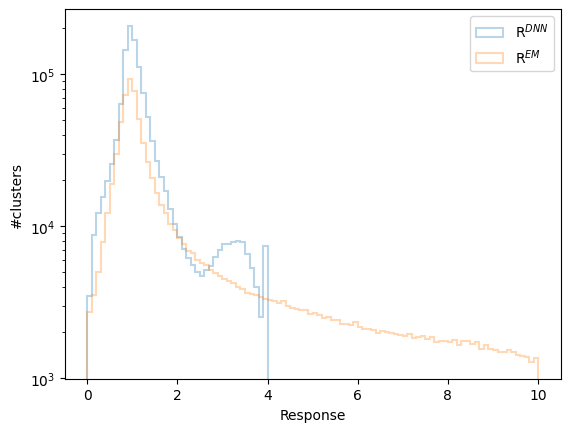

In [5]:
plt.hist(dfClus.r_e_predicted.values, bins=binsResp, label=r'R$^{DNN}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfClus.clusterE.values / dfClus.cluster_ENG_CALIB_TOT.values, bins=binsResp, label=r'R$^{EM}$',alpha=0.3, histtype='step', linewidth=1.5) 
plt.xlabel('Response') 
plt.ylabel('#clusters')
plt.yscale('log') 
plt.legend()

## plot energy of clusters 

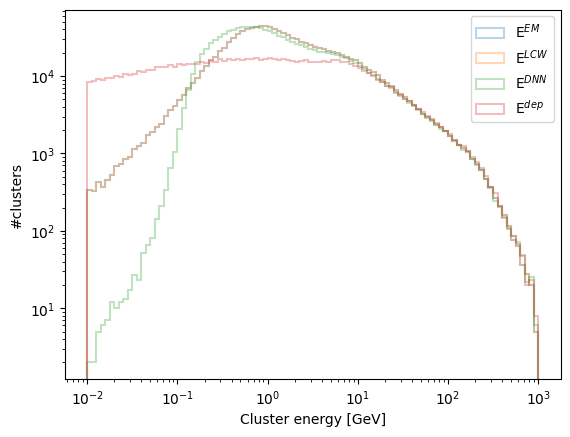

In [6]:
plt.hist(dfClus.clusterE.values, bins=binsEnergy, label=r'E$^{EM}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfClus.clusterECalib.values, bins=binsEnergy, label=r'E$^{LCW}$',alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfClus.clusterEDNN.values, bins=binsEnergy, label=r'E$^{DNN}$',alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfClus.cluster_ENG_CALIB_TOT.values, bins=binsEnergy, label=r'E$^{dep}$',alpha=0.3, histtype='step', linewidth=1.5) 
plt.xlabel('Cluster energy [GeV]') 
plt.ylabel('#clusters')
plt.yscale('log') 
plt.xscale('log') 
plt.legend()

## plot labels for each clusters

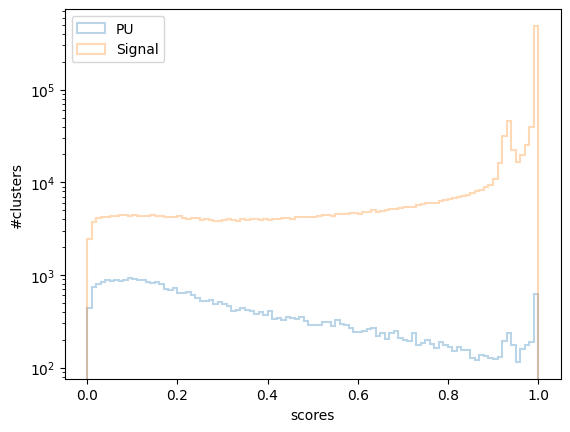

In [7]:
bin = np.linspace(0,1,100+1) 
signal = dfClus[dfClus['labels'] == 0].Scores
pu = dfClus[dfClus['labels'] == 1].Scores

plt.hist(pu, bins=bin, label=r'PU', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(signal, bins=bin, label=r'Signal',alpha=0.3, histtype='step', linewidth=1.5) 
plt.xlabel('scores') 
plt.ylabel('#clusters')
plt.yscale('log') 
# plt.xscale('log') 
plt.legend()

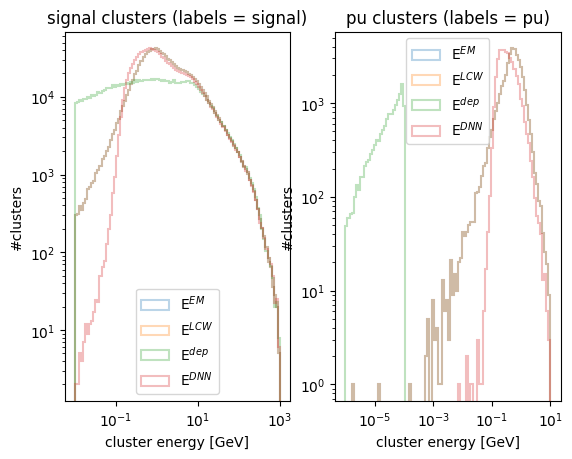

In [30]:
signal_clusterE = dfClus[dfClus['labels'] == 0].clusterE
signal_clusterELCW = dfClus[dfClus['labels'] == 0].clusterECalib
signal_clusterEdep = dfClus[dfClus['labels'] == 0].cluster_ENG_CALIB_TOT
signal_clusterEDNN = dfClus[dfClus['labels'] == 0].clusterEDNN

pu_clusterE    = dfClus[dfClus['labels'] == 1].clusterE
pu_clusterELCW = dfClus[dfClus['labels'] == 1].clusterECalib
pu_clusterEdep = dfClus[dfClus['labels'] == 1].cluster_ENG_CALIB_TOT
pu_clusterEDNN = dfClus[dfClus['labels'] == 1].clusterEDNN

fig, (ax1, ax2) = plt.subplots(1, 2)

# plt.hist(dfClus.clusterE.values, bins=binsEnergy, label=r'E$^{EM}$', alpha=0.3, histtype='step', linewidth=1.5) 
# plt.hist(dfClus.clusterECalib.values, bins=binsEnergy, label=r'E$^{LCW}$',alpha=0.3, histtype='step', linewidth=1.5) 
# plt.hist(dfClus.clusterEDNN.values, bins=binsEnergy, label=r'E$^{DNN}$',alpha=0.3, histtype='step', linewidth=1.5) 
# plt.hist(dfClus.cluster_ENG_CALIB_TOT.values, bins=binsEnergy, label=r'E$^{dep}$',alpha=0.3, histtype='step', linewidth=1.5) 

ax1.hist(signal_clusterE, bins=binsEnergy, label=r'E$^{EM}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax1.hist(signal_clusterELCW, bins=binsEnergy, label=r'E$^{LCW}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax1.hist(signal_clusterEdep, bins=binsEnergy, label=r'E$^{dep}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax1.hist(signal_clusterEDNN, bins=binsEnergy, label=r'E$^{DNN}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax1.set_title('signal clusters (labels = signal)')
ax1.set_xlabel('cluster energy [GeV]') 
ax1.set_ylabel('#clusters')
ax1.set_xscale('log') 
ax1.set_yscale('log') 
ax1.legend()

binsEdep_pu = np.logspace (-6, 1, 100+1)
ax2.hist(pu_clusterE, bins=binsEdep_pu,label=r'E$^{EM}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax2.hist(pu_clusterELCW, bins=binsEdep_pu,label=r'E$^{LCW}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax2.hist(pu_clusterEdep, bins=binsEdep_pu,label=r'E$^{dep}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax2.hist(pu_clusterEDNN, bins=binsEdep_pu,label=r'E$^{DNN}$', alpha=0.3, histtype='step', linewidth=1.5) 
ax2.set_title('pu clusters (labels = pu)')
ax2.set_xlabel('cluster energy [GeV]') 
ax2.set_ylabel('#clusters')
ax2.set_xscale('log') 
ax2.set_yscale('log') 
ax2.legend()

# plt.hist(pu, bins=bin, label=r'PU', alpha=0.3, histtype='step', linewidth=1.5) 
# plt.hist(signal, bins=bin, label=r'Signal',alpha=0.3, histtype='step', linewidth=1.5) 
# plt.xlabel('scores') 
# plt.ylabel('#clusters')
# plt.yscale('log') 
# plt.xscale('log') 
# plt.legend()

## Plot jet energies and energies of sum of clusters

Text(0, 0.5, '#Jets')

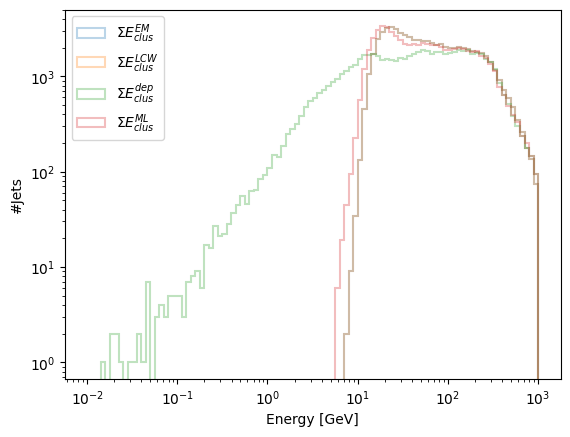

In [11]:
plt.hist(dfJet.sumClusterE.values, bins=binsEnergy, label=r'$\Sigma E^{EM}_{clus}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.sumClusterECalib.values, bins=binsEnergy, label=r'$\Sigma E^{LCW}_{clus}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.sumClusterETruth.values, bins=binsEnergy, label=r'$\Sigma E^{dep}_{clus}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.sumClusterENet.values, bins=binsEnergy, label=r'$\Sigma E^{ML}_{clus}$', alpha=0.3, histtype='step', linewidth=1.5) 
plt.yscale('log')
plt.xscale('log') 
plt.legend()
plt.xlabel('Energy [GeV]')
plt.ylabel('#Jets')

Text(0, 0.5, '#Jets')

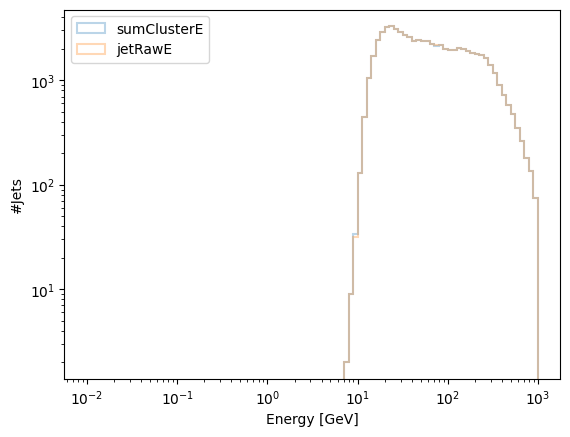

In [13]:
plt.hist(dfJet.sumClusterE.values, bins=binsEnergy, label='sumClusterE', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.jetRawE.values, bins=binsEnergy, label='jetRawE', alpha=0.3, histtype='step', linewidth=1.5) 
plt.yscale('log')
plt.xscale('log') 
plt.legend()
plt.xlabel('Energy [GeV]')
plt.ylabel('#Jets')

Text(0, 0.5, '#Jets')

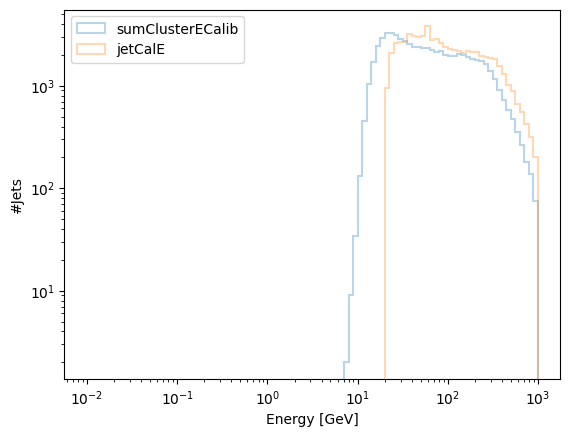

In [14]:
plt.hist(dfJet.sumClusterECalib.values, bins=binsEnergy, label='sumClusterECalib', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.jetCalE.values, bins=binsEnergy, label='jetCalE', alpha=0.3, histtype='step', linewidth=1.5) 
plt.yscale('log')
plt.xscale('log') 
plt.legend()
plt.xlabel('Energy [GeV]')
plt.ylabel('#Jets')

Text(0, 0.5, '#Jets')

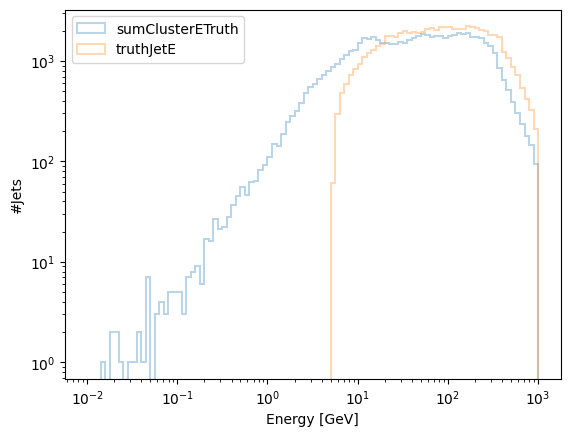

In [15]:
plt.hist(dfJet.sumClusterETruth.values, bins=binsEnergy, label='sumClusterETruth', alpha=0.3, histtype='step', linewidth=1.5) 
plt.hist(dfJet.truthJetE.values, bins=binsEnergy, label='truthJetE', alpha=0.3, histtype='step', linewidth=1.5) 
plt.yscale('log')
plt.xscale('log') 
plt.legend()
plt.xlabel('Energy [GeV]')
plt.ylabel('#Jets')

## Plot sumClusterEem vs truthJetPt

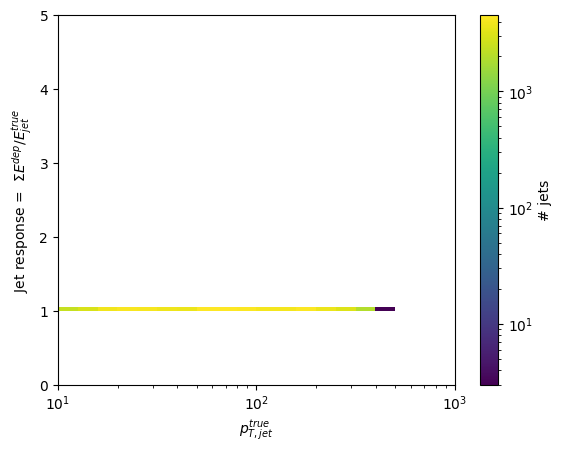

In [44]:
x = dfJet.truthJetPt.values
y = dfJet.truthJetE.values / dfJet.truthJetE.values
binsResp_2d = np.linspace(0, 5, 100+1)
plt.hist2d(x,y,bins = [binsPt, binsResp_2d],norm=mcolors.LogNorm())
plt.xscale('log')
plt.colorbar(label='# jets')
plt.xlabel(r'$p_{T,jet}^{true}$')
plt.ylabel(r'Jet response =  $\Sigma E^{dep} / E_{jet}^{true}$')
plt.show()

# hist, phi_edges, eta_edges = np.histogram2d(x,y, bins=[binsPt, binsResp])
# plt.figure(figsize=(10, 6))
# plt.imshow(hist, extent=[binsPt.min(), binsPt.max(), binsResp.min(), binsResp.max()], 
#             origin='lower', aspect='auto', norm=mcolors.LogNorm())
# plt.colorbar(label='# jets')
# plt.xscale('log')
# plt.xlabel(r'$p_{T,jet}^{true}$')
# plt.ylabel(r'Jet response = $\Sigma E^{EM} / E_{jet}^{true}$')
# plt.show()


## get modes and iqr

In [17]:
def GetModeIQR(x,y,binx, biny):
    modes = [] 
    iqr = []
    for i in range(len(binx) - 1):
        mask = (x >= binx[i]) & (x < binx[i + 1])
        y_bin = y[mask]
        counts, bins, _  = plt.hist(y_bin, bins=20, alpha=0.5, label=f'{binx[i]:.2f} - {binx[i + 1]:.2f}')

        hist_mode = mode(y_bin)[0].flatten()
        if hist_mode.size > 0:
            modes.append(hist_mode[0])
        else:
            modes.append(-1)
            
        # hist_mode = scipy.stats.mode(y_bin)[0].flatten()

        # if hist_mode.size() > 0: 
        #     modes.append(hist_mode)
        # else:
        #     modes.append(-1)
        data_iqr = scipy.stats.iqr(y_bin) / (2 * np.median(y_bin))
        
        iqr.append(data_iqr)
        plt.clf()
    return modes, iqr

In [37]:
truthJetPt = dfJet.truthJetPt.values
JetResponse_jetCalE = dfJet.jetCalE.values / dfJet.truthJetE.values
JetResponse_jetRawE = dfJet.jetRawE.values / dfJet.truthJetE.values
JetResponse_sumClusterE = dfJet.sumClusterE.values / dfJet.truthJetE.values
JetResponse_sumClusterENet = dfJet.sumClusterENet.values / dfJet.truthJetE.values
JetResponse_sumClusterELCW = dfJet.sumClusterECalib.values / dfJet.truthJetE.values
JetResponse_sumClusterEdep = dfJet.sumClusterETruth.values / dfJet.truthJetE.values

modes_jetCalE, iqr_jetCalE               = GetModeIQR(truthJetPt, JetResponse_jetCalE, binsPt, binsResp_2d)
modes_jetRawE, iqr_jetRawE               = GetModeIQR(truthJetPt, JetResponse_jetRawE, binsPt, binsResp_2d)
modes_sumClusterE, iqr_sumClusterE       = GetModeIQR(truthJetPt, JetResponse_sumClusterE, binsPt, binsResp_2d)
modes_sumClusterENet, iqr_sumClusterENet = GetModeIQR(truthJetPt, JetResponse_sumClusterENet, binsPt, binsResp_2d)
modes_sumClusterELCW, iqr_sumClusterELCW = GetModeIQR(truthJetPt, JetResponse_sumClusterELCW, binsPt, binsResp_2d)
modes_sumClusterEdep, iqr_sumClusterEdep = GetModeIQR(truthJetPt, JetResponse_sumClusterEdep, binsPt, binsResp_2d)

modes_jetCalE = np.ravel(modes_jetCalE)
modes_jetRawE = np.ravel(modes_jetRawE)
modes_sumClusterE = np.ravel(modes_sumClusterE)
modes_sumClusterENet = np.ravel(modes_sumClusterENet)
modes_sumClusterELCW = np.ravel(modes_sumClusterELCW)
modes_sumClusterEdep = np.ravel(modes_sumClusterEdep)




/tmp/ipykernel_26351/3191686551.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  hist_mode = mode(y_bin)[0].flatten()


<Figure size 640x480 with 0 Axes>

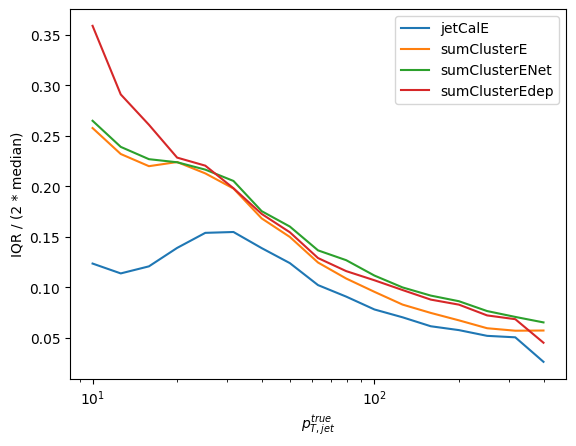

In [41]:

plt.plot(binsPt[:-1], iqr_jetCalE, label='jetCalE')
# plt.plot(binsPt[:-1], iqr_jetRawE, label='jetRawE')
plt.plot(binsPt[:-1], iqr_sumClusterE, label='sumClusterE')
plt.plot(binsPt[:-1], iqr_sumClusterENet, label='sumClusterENet')
# plt.plot(binsPt[:-1], iqr_sumClusterELCW, label='sumClusterELCW')
plt.plot(binsPt[:-1], iqr_sumClusterEdep, label='sumClusterEdep')
plt.xscale('log')
plt.xlabel(r'$p_{T,jet}^{true}$')
plt.ylabel(r'IQR / (2 * median)')

plt.legend()

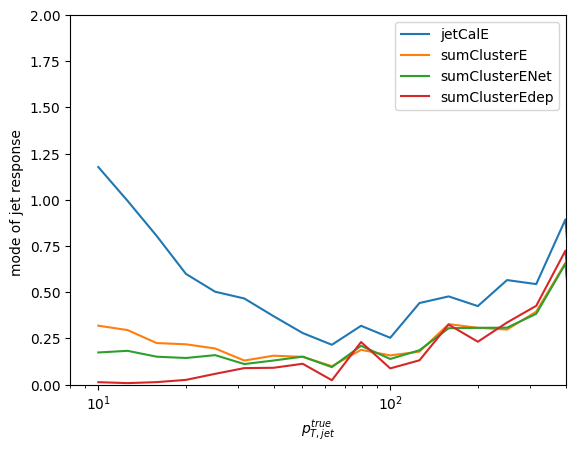

In [40]:

plt.plot(binsPt[:-1], modes_jetCalE, label='jetCalE')
# plt.plot(binsPt[:-1], modes_jetRawE, label='jetRawE')
plt.plot(binsPt[:-1], modes_sumClusterE, label='sumClusterE')
plt.plot(binsPt[:-1], modes_sumClusterENet, label='sumClusterENet')
# plt.plot(binsPt[:-1], modes_sumClusterELCW, label='sumClusterELCW')
plt.plot(binsPt[:-1], modes_sumClusterEdep, label='sumClusterEdep')
plt.xscale('log')
plt.xlim(8e0, 4e2)
plt.ylim(0, 2)
plt.xlabel(r'$p_{T,jet}^{true}$')
plt.ylabel(r'mode of jet response ')
plt.legend()
# modes_jetCalE